# Project - Gege Li

## Abstract

Whether a product has targeted customers and how it can be accepted by the market is the essence of the success of a product. This project aims to identify the target customers of an insurance product based on a user dataset which is provided by an insurance company, including their willingness to purchase a product (yes or no) and their previous purchasing history. 
We processed different types of features, tidied invalid data, dropped the duplicated data, used the insights from EDA, and various feature selection tools (Chi-square test) to select features. We also build six different types of prediction models for this classification problem and an ensemble model that combines all six base models. Comparing the performance of all models on the accuracy, precision, and other metrics, the VotingClassifier, which is the ensemble model, did the best on this predictive problem for its lower risk of overfitting and better performance on generalization. Based on the ensemble model, we can successfully predict the highest probability of targeted customers. 

## Introduction


Insurance plays an increasingly important role in our daily life.  The insurance industry involves more than 2.4 trillion USD in the USA just in the year of 2018. During this COVID pandemic period, we realize more how important insurance can play in life.

Therefore, for our project, we focus on an insurance company. Our data set is from Kaggle. It is from an anonymous insurance company that wants to identify customers willing to buy a new product. It has 15 columns and 14016 raws. The response variable is 'TARGET'.

For our project, the main question will be how to identify the target customers. We will apply a series of EDA work to build some knowledge about the features. Also, build insight into these features and find the potential features for modeling.

Then we are going to build a series of predictive models to find whether the customer will buy the new product or not. We plan to build logistic regression model, SVM, KNN, random forest model, XG boost, and MLP. Then we will use voting classifier to build an ensemble model. 

Finally, we will compare the performance of these models and choose one as our preferred model. At last, come up with our conclusion. The result of our research will help the company identify potential customers and it can help insurance companies reduce the workload.

## Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd

# check and read the dataset from github
df = pd.read_csv('https://raw.githubusercontent.com/gegeli638/DAV-6150/master/Final%20Project/datasets_745761_1291017_Customer_data.csv')
df.head()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3


In [ ]:
df.ID.value_counts()

66853     2
147678    2
21091     2
107064    2
139877    2
         ..
5186      1
14042     1
11993     1
9944      1
16384     1
Name: ID, Length: 11008, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TARGET      14016 non-null  object 
 1   loyalty     14016 non-null  int64  
 2   ID          14016 non-null  int64  
 3   age         14016 non-null  int64  
 4   city        14016 non-null  int64  
 5   LOR         14016 non-null  int64  
 6   prod_A      14016 non-null  int64  
 7   type_A      14016 non-null  int64  
 8   type_B      14016 non-null  int64  
 9   prod_B      14016 non-null  int64  
 10  turnover_A  14016 non-null  float64
 11  turnover_B  14016 non-null  float64
 12  contract    14016 non-null  int64  
 13  age_P       14016 non-null  int64  
 14  lor_M       14016 non-null  int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 1.6+ MB


This dataset is from Kaggle website. https://www.kaggle.com/rluyck/insurance-company?select=Customer_data.csv 

It has 15 columns and 14016 rows. Our response variable is 'TARGET'. The describe of each attributes is as follow:

- ID: Unique customer identifier 
- Target: Indicator of buying the new product (0 = no, 1= yes) 
- Loyalty: Loyalty level, from low to high (0 to 3), 99 = unclassified 
- Age: Age in years 
- City: Unique code per city 
- Age_p: Age of partner in years 
- LOR: Length of relationship in years 
- LOR_m: Length of relationship in months 
- Prod_A: Bought product A (0= no, 1=yes) 
- Type_A: Type of product A  (3, 6, 9)
- Turnover_A: Amount of money spent on product A 
- Prod_B: Bought product B (0= no, 1=yes) 
- Type_B: Type of product B (0, 3, 6, 9)
- Turnover_B: Amount of money spent on product B 
- Contract: Type of contract 

Based on the information above, we found out that it did not mention the contract type. Therefore we can check the value first.

In [ ]:
#df['contract'].value_counts()
df['contract'].value_counts()

2    14016
Name: contract, dtype: int64

There is only one type for contract, it is not a useful explanatory variable. We will not use this feature for feature selection.

Based on the given information, we also knew there are  9 different categorical data, and the remaining 6 are continuous variables.
- numerical:  age, age_p, LOR, LOR_m,  trunover_A, trunover_B.
- categorical: ID, TARGET, city, Loyalty, Prod_A, Type_A, Prod_B, Type_B, contract.

In [ ]:
#null value check
df.isnull().sum()

TARGET        0
loyalty       0
ID            0
age           0
city          0
LOR           0
prod_A        0
type_A        0
type_B        0
prod_B        0
turnover_A    0
turnover_B    0
contract      0
age_P         0
lor_M         0
dtype: int64

There is no missing value. We can see the details.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loyalty,14016.0,50.381778,48.471790,0.000000,2.000000,3.000000,99.000000,99.000000
ID,14016.0,37672.440068,44855.639209,1.000000,6741.500000,13514.500000,62738.000000,151811.000000
age,14016.0,35.882920,12.974634,5.000000,25.000000,33.000000,43.000000,102.000000
city,14016.0,-710.950128,26702.329184,-999999.000000,2.000000,2.000000,2.000000,235.000000
LOR,14016.0,0.926299,0.965212,0.000000,0.000000,1.000000,1.000000,6.000000
prod_A,14016.0,0.533818,0.498873,0.000000,0.000000,1.000000,1.000000,1.000000
type_A,14016.0,1.607877,1.508991,0.000000,0.000000,3.000000,3.000000,6.000000
type_B,14016.0,1.918878,1.686038,0.000000,0.000000,3.000000,3.000000,9.000000
prod_B,14016.0,0.599458,0.490026,0.000000,0.000000,1.000000,1.000000,1.000000
turnover_A,14016.0,379.161320,92.612207,300.095909,334.919412,367.891493,399.744923,5568.784139


From this table, we can obviously find that there is unreasonable value in city(-999999.00). And the max number of ID is more than 14016, the reason may be contributed to the fact that ID is not collected in order. We will check out that later in the data preparation part.

Firstly we start to check the response variable- TARGET.

### Response variable

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


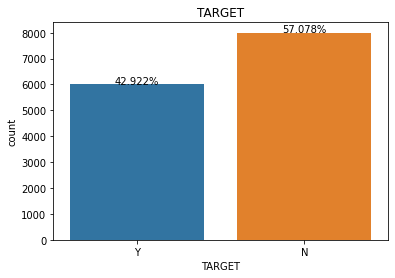

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#target
#sns.countplot(x='TARGET', data=df)
ax = sns.countplot(x="TARGET", data=df)
plt.title('TARGET')
total = len(df['TARGET'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

In [ ]:
df['TARGET'].value_counts()

N    8000
Y    6016
Name: TARGET, dtype: int64

Based on this diagram, we knew that our target variable is a  bit imbalanced, and it is about a 4:3 ratio on the quantity. Without SMOTE or other processes, the null error rate is 57%(8000/14016)We will use other techniques, such as weighted parameters in the algorithm or SMOTE, to deal with this imbalanced nature.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c1f727518>,
      dtype=object)

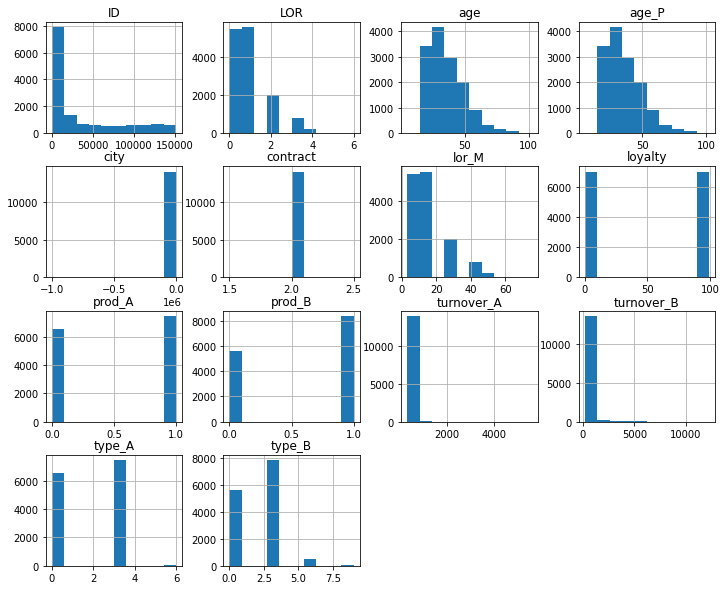

In [ ]:
df.hist(figsize=(12,10))

Based on the distribution of the data set, we have these findings:

-  we can find turnover_A does not provide much information, or it is quite imbalanced. turnover_B may also have the same issue.

- age and age_P has almost the same distribution, and it may have some colinearity. For further modeling building, we may only use one of them.

- As we mentioned before, contract has only one type which makes it not a helpful variable. 

- there are some values in city which are below 0, we need to check right after. 

Since some features are still unclear, We will draw more plots to show the details later. This time, we can safely delete contract for its lack of information.

### Categorical variable

We will analyze these features in detail. For the city attribute, we can find there are only 65 unique values. 

In [ ]:
#check amount of unique value
df['city'].value_counts()

2      13720
1         28
0         26
8         21
9         20
       ...  
127        1
131        1
115        1
107        1
187        1
Name: city, Length: 65, dtype: int64

Through the number count, we now know the majority of data are collected in city 2 which contains 13720. It also implied that this is an extreme imbalanced data. This feature is possible to be a bad explanatory variable for this low information gain. 

In [ ]:
#check unique value
df.city.unique()

array([      2,       5,       4,       1,       0,       7,       6,
             9,      11,       8,      14,      15,      12,     116,
            13,     111,      10,       3,     114,     142, -999999,
           229,     178,     110,     177,     137,      17,     148,
           122,      22,      58,     121,     127,      33,     125,
           209,      72,      31,      51,      16,     107,     174,
           141,     191,     104,     129,      18,      49,      73,
            94,     131,     219,     187,      28,      89,     115,
            53,     126,      47,      84,     235,     161,     197,
            23,      30])

This odd -999999 possibly means that it is unspecified city data. we can then use iloc to check detail. For this part of data, we will deal with it later in the data prep section. However, even we clean this particular data, it will not be used for modeling. 

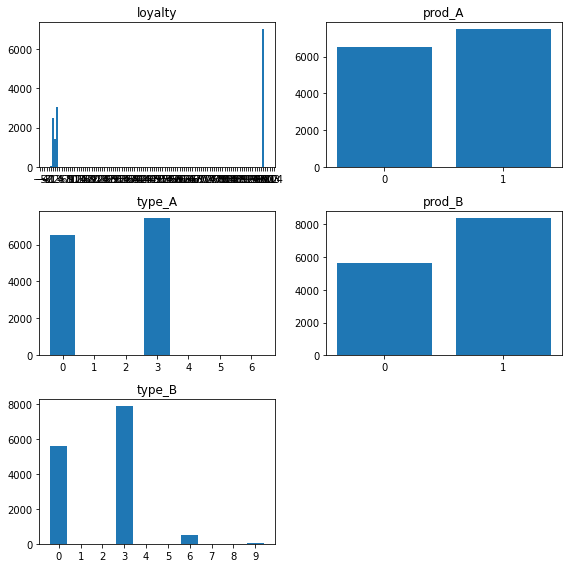

In [ ]:
from matplotlib.ticker import MultipleLocator #, FormatStrFormatter
#categorical attribute
categorial = ['loyalty', 'prod_A', 'type_A', 'prod_B', 'type_B']#TARGET, 

# set figure size
fig = plt.figure(figsize=(8, 8))
i = 1
for f in categorial:
    val_cnt = df[f].value_counts()
    plt.subplot(3, 2, i)
    plt.bar(x=val_cnt.index, height=val_cnt.values)
    #df['loyalty'].value_counts().plot.bar(figsize=(8,5))
    plt.title(f)
    ax = plt.gca()
    major_locator = MultipleLocator(1)
    ax.xaxis.set_major_locator(major_locator)
    plt.tight_layout()
    i += 1

plt.show()

From this bar plot we can find that:
- Both Product A and B have a similar pattern. Both showed that there are more people who have insurance comparing with people who do not have.

- type A and type B are mainly similar, except type B has one more small quantity of the third type. 

- city seemed to have negative value, we can also check it

- loyalty has some interesting distribution. Most types are located closely, but one type, which is far from this range, has the highest quantity of whole data.


Due to this interesting distribution of loyalty, we now check it in detail.

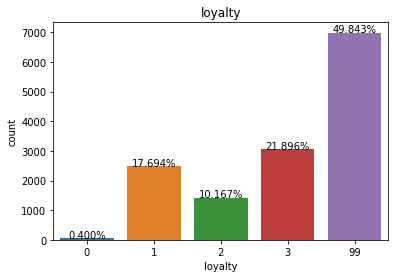

In [ ]:
#loyalty
ax = sns.countplot(x="loyalty", data=df)
plt.title('loyalty')
total = len(df['loyalty'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

There are nearly half of loyalty is 99 which means unclassified. Cause this is a categorical feature, we will set 99 as another type of loyalty later in the modeling part.

Now, we have our summary for this categorical data:

- All the categorical variables except contract are possible good features for modeling. 

### Numerical variable
Then we are going to see more details of six numerical features.

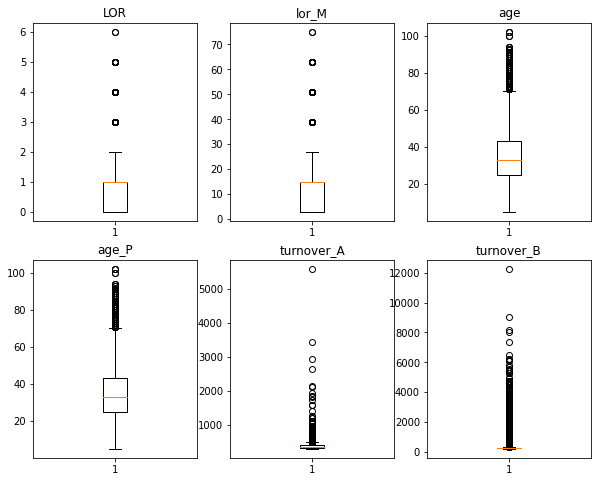

In [ ]:
#numerical attribute
numerical = ['LOR', 'lor_M', 'age', 'age_P', 'turnover_A', 'turnover_B']

# set figure size
fig = plt.figure(figsize=(10, 8))
i = 1
for f in numerical:
    plt.subplot(2, 3, i)
    plt.boxplot(df[f])
    plt.title(f)
    i += 1
plt.show()

From these plots we have these findings and insights:
- These two LOR related attributes are possible good explanatory variables for our response variable. However, based on their mathematical relationship, we knew they are directly colinear. We may only choose one of them for later feature selection.
- Age-related attributes, age and age_P are also good possible attributes. Similar to LOR and LOR_M, it may also have strong collinearity. Based on our search on general marriage 

### Relationship
Then we are going to see their relationship.

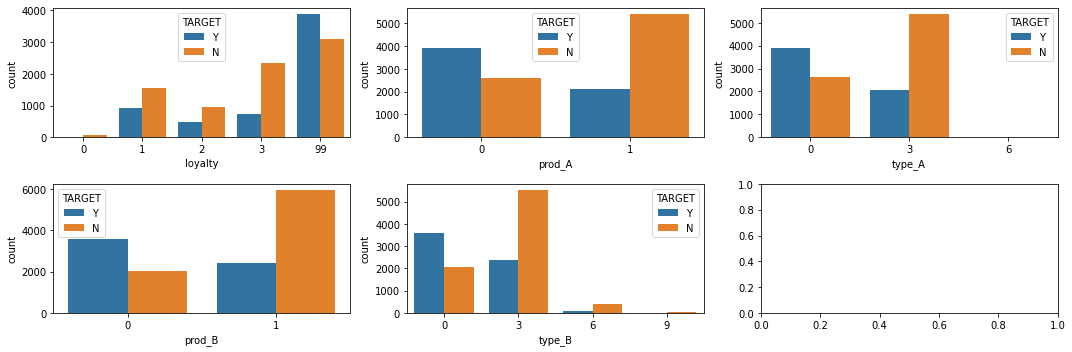

In [ ]:
#relationship of categorical data 

fig, axes =plt.subplots(2,3, figsize=(15,5)) #, sharex=True
axes = axes.flatten()
#axes.flat[0].set_visible(False)

object_bol = categorial
for ax, catplot in zip(axes, df.dtypes[object_bol].index):
    sns.countplot(x=catplot,hue='TARGET', data=df, ax=ax)#, color='skyblue'
plt.tight_layout()  
plt.show()

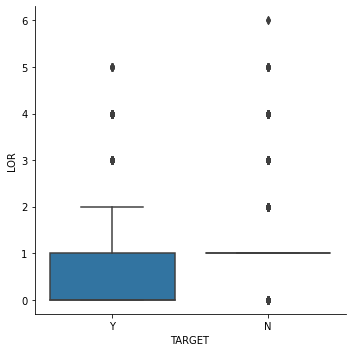

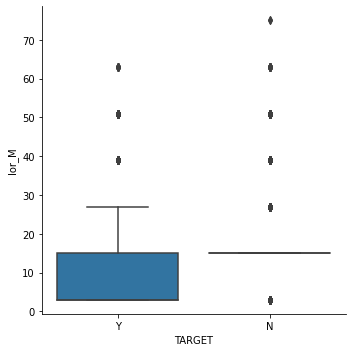

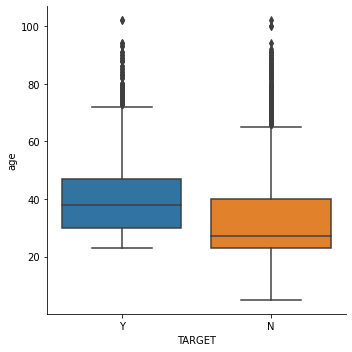

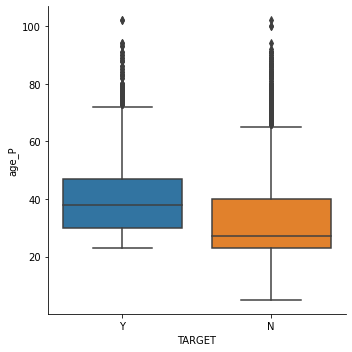

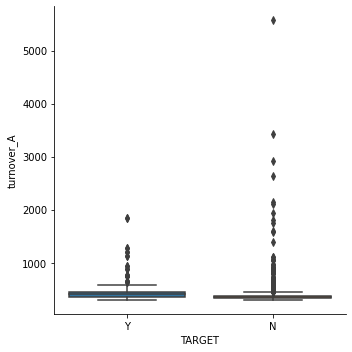

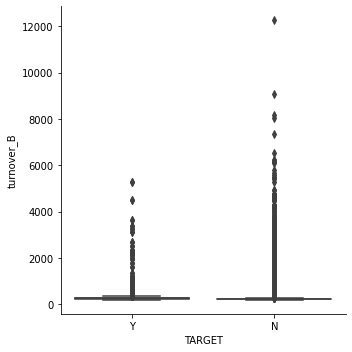

In [ ]:
#relationship of numerical data 

#fig, axes =plt.subplots(2,3, figsize=(15,5), sharex=True) #
#axes = axes.flatten()
#axes.flat[0].set_visible(False)

numerical_bol = numerical
for ax, catplot in zip(axes, df.dtypes[numerical_bol].index): #
    #sns.countplot(x=catplot,hue='TARGET', data=df, ax=ax)#, color='skyblue'
    #sns.factorplot(x='TARGET', y=catplot, data=df, kind='box') 
    sns.catplot(x="TARGET", y=catplot, kind="box", data=df)
plt.tight_layout()  
plt.show()

This categorical part reveals some interesting fact:

 - For the LOR(relationship related) attribute, median value of 26 months (about 2 years) tends to buy this target product. Also, for the people not buying the response variable, there are higher outliers that represent a higher year of relationship in couples. However, overall it is not very obvious. It may be a fine explanatory variable but not great.  

 - For the age-related attribute, the median age (age,age_p) of buying target product is around 40, while median age of around 28 tends to not buying this target product. Even the third quantile of not buying the product has about the same age with median of buying target product. 



This given information even helped to build the persona of this product. Our team may make an assumption that this target product may be targeted for middle age couples which has a relatively short relationship. Although we try to find some more references to support this assumption, it is not quite realistic to get this kind of business secret information from online directly. We continue to check heatmaps.

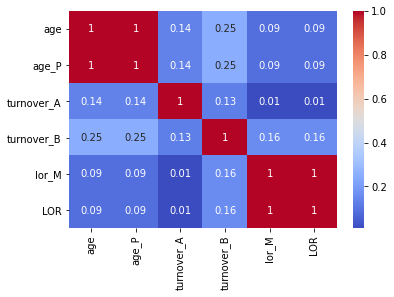

In [ ]:
#relationship
#change target into 0 and 1
#df['TARGET'] = df['TARGET'].map({'Y': 1, 'N': 0})
#draw the correlation map
cm = df[[ 'age', 'age_P', 'turnover_A', 'turnover_B','lor_M','LOR']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='coolwarm')

In this heatmap, if only look at this correlation matrix, we have these findings:

- There is a very weak relationship between turnover A and turnover B. So we cannot choose only one of them, we need to do more analysis before modeling.

- One thing noticeable is that age and age_P showed a strong collinearity. It makes sense that generally, one and the partner are at the same age, which can verify our finding from the previous distribution plot. Overall, all value does not show a strong correlation among them.

- Similar to age and age_P, LOR and LOR_M, which also has a strong correlation of 1 since it is just a conversion of month and years. This is also colinearity. For feature selection, we may only use one of them.

By combining all these numerical attributes analysis, we have the summary as follows:

- age/age_P , LOR /LOR_m are both good numerical features to choose for modeling. However, due to their collinearity, only one out of each category should be chosen. 

- turnover A and turnover B are good numerical features for modeling. 

After EDA process, we need to handle some improper data now.

## Data Preparation & Prepped Data Review

### Dealing with repetative data

We need to check row of the data to ensure there is no repetitive data.

In [ ]:
df[df['ID'].duplicated(keep=False)]

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14011,Y,99,151601,30,2,0,0,0,0,0,386.434278,284.309508,2,30,3
14012,Y,1,151634,27,2,2,1,3,3,1,376.842591,266.993794,2,27,27
14013,Y,99,151679,26,2,0,0,0,0,0,434.805703,284.629361,2,26,3
14014,Y,1,151804,75,2,1,1,3,3,1,366.273857,270.573265,2,75,15


In [ ]:
#choose one row to check the duplicate
df[df['ID'] == 306]

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.00837,2,62,3
11012,Y,99,306,62,2,0,0,0,0,0,384.577469,287.00837,2,62,3


In [ ]:
df['TARGET'] = df['TARGET'].map(lambda x :1  if x == 'Y' else 0)
df.head()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,1,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,1,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,1,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,1,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,1,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3


In [ ]:
#we want to deal with duplicated value
df_sum = df.apply(lambda x: x.duplicated()).sum()
df_sum

TARGET        14014
loyalty       14011
ID             3008
age           13930
city          13951
LOR           14009
prod_A        14014
type_A        14013
type_B        14012
prod_B        14014
turnover_A     3008
turnover_B     3008
contract      14015
age_P         13930
lor_M         14009
dtype: int64

Based on this check, we mainly want to check ID term. Since most terms are making sense to have dramatic numbers of duplicates since the variables are either binary or some limited numbers of type. Contributing to this belief, we know there are 3000 rows of ID involving duplicates. Based on our general understanding of the data, it is not correct to directly drop these data since it is also 25% of our data.

When we check with other rows of data, interestingly, it showed the same pattern in turnoverA and turnoverB. Since we knew turnover terms both represent money spent. And generally, people spent is a bit different. These same 3008 values suggested that it is possible that these turnover and ID are highly correlated and we just have the duplicates on the record. This issue can be caused by merging data processes on data collection.

After we think the duplicate has the same row of data. We now just picked one example


In [ ]:
# check one row whether it is true whole row is the same
# just picked one value we found before
df[df['ID'] == 306]

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
4,1,99,306,62,2,0,0,0,0,0,384.577469,287.00837,2,62,3
11012,1,99,306,62,2,0,0,0,0,0,384.577469,287.00837,2,62,3


We can tell duplicates with the same ID has the same value on other columns, now we are safe to drop duplicates.

In [ ]:
# sorting by ID
df.sort_values("ID", inplace = True) 
  
# dropping ALL duplicte values but keep first showed 
df.drop_duplicates(subset ="ID", 
                     keep = 'first', inplace = True) 
  
# displaying data 
df.describe()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
count,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.0,11008.000000,11008.000000
mean,0.273256,46.533612,27023.459938,34.845203,-724.143078,0.982649,0.584393,1.759448,2.097929,0.652253,372.332403,344.120565,2.0,34.845203,14.791788
std,0.445651,48.292402,38576.841141,13.032781,26949.664365,0.939415,0.492849,1.490133,1.671441,0.476277,96.685932,524.372413,0.0,13.032781,11.272981
min,0.000000,0.000000,1.000000,5.000000,-999999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.095909,191.962852,2.0,5.000000,3.000000
25%,0.000000,2.000000,5480.000000,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,332.229899,218.302029,2.0,24.000000,3.000000
50%,0.000000,3.000000,11025.500000,31.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,361.930298,235.025216,2.0,31.000000,15.000000
75%,1.000000,99.000000,16632.250000,42.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,391.567662,253.759401,2.0,42.000000,15.000000
max,1.000000,99.000000,151811.000000,102.000000,235.000000,6.000000,1.000000,6.000000,9.000000,1.000000,5568.784139,12249.084770,2.0,102.000000,75.000000


Another data need to deal with is values -999999, based on describe function we know, the highest number is 235, since we already in city column, all the ordinal numbers are representing one city. 
The magnitude and positivity do not have real meaning. We can just assign this city to an arbitrary number which is not the same from the list. To make it a safe value, we decide to convert it into 999 since the previous highest is 235 and this assignment will not cause an extra increase in certain city distribution.

In [ ]:
#replace
df['city'].replace({-999999: 999}, inplace=True)

Now we finished the data preparation. We can re-run our EDA to see the difference.

### Prepped Data Review

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c1ab608d0>,
      dtype=object)

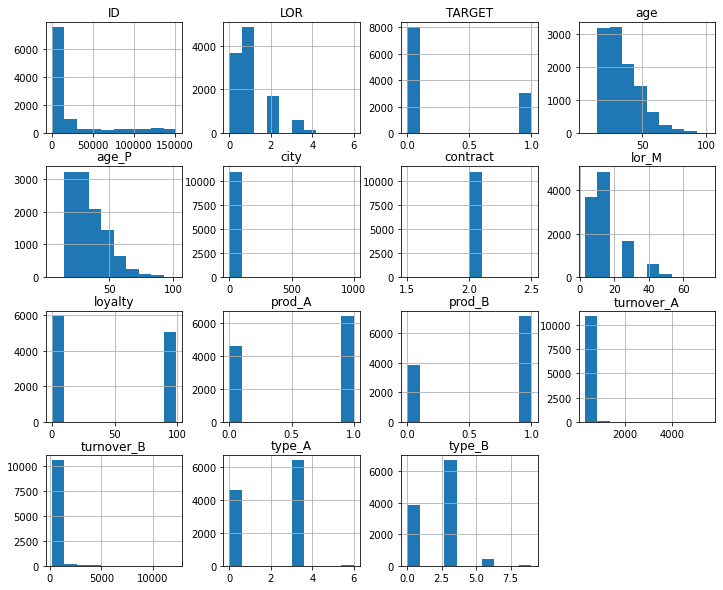

In [ ]:
df.hist(figsize=(12,10))

Now we can see that after we handled the repetitive rows and negative values, the distribution didn't change a lot except values on city are all positive. Overall it only changed a bit on mean or medians but we got a clearer data set to build models and do further analysis.


In [ ]:
#check unique value
df.city.unique()

array([  2, 229, 178,   0,   8,   3,   4,  10, 110,   7, 177,   1,   6,
       137,  17, 999,  13,  14, 148,   5,  11,  15, 122,  22,   9,  58,
       121,  12, 127,  33, 125, 209,  72,  31,  51,  16, 107, 174, 141,
       191, 104, 129,  18,  49,  73,  94, 131, 219, 187, 114,  28,  89,
       115,  53, 126,  47,  84, 235, 161, 197,  23,  30, 116, 111, 142])

Now we can see that we change the unclassified value(999) of city.

Then we can do the data preparation part.

### Chi-square testing for selecting categorical feature

We will use chi-squared statistic for feature selection on categorical data. To use chi-square test，we also need to run ordinalcoder to the explanatory variable. variable. Then select K best function is to select the k lowest p-values based on chi2 Statistics. Thus p-value gave the score of these relevant features.

In [ ]:
# categorized data
cate_data= df.copy()
cate_data.drop(['ID','city','turnover_A','turnover_B','age','age_P','lor_M','LOR'], axis=1, inplace= True)

In [ ]:
#sanity check
cate_data.head(4)

,TARGET,loyalty,prod_A,type_A,type_B,prod_B,contract
3008,0,99,0,0,0,0,2
3009,0,3,0,0,3,1,2
3010,0,99,1,3,3,1,2
3011,0,2,1,3,3,1,2


Feature 0: 6383.000000
Feature 1: 100.779245
Feature 2: 313.679590
Feature 3: 310.573707
Feature 4: 371.671810
Feature 5: 311.024441
Feature 6: nan


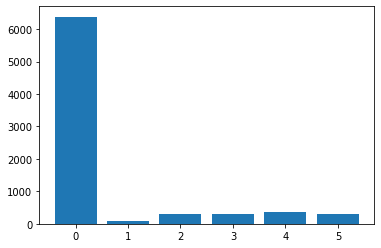

In [ ]:
# load library
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
 
# load the dataset
def load_dataset(dataframe):
	# load the dataset as a pandas DataFrame
	data = dataframe.copy()
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	#x is all the attributes
	# y is our response variable
	X = dataset[:, :7]
	y = dataset[:,0]
	# format all fields as string
	X = X.astype(str)
	return X, y
 
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc
 
# feature selection use chisquare testing
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = load_dataset(cate_data)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Based on feature selection, feature 0 is the target variable, which should not count. Feature 6, contract, has only one value and can not be applied to the calculation. Based on the score, we choose feature 3 to feature 6 which includes prod_A, type_A, prod_B, and type_B.


Combining our analysis of both features from numerical and categorical variables.
We choose features as follows:
- **prod_A**, **type_A**, **prod_B**,**type_B**, **age**, **turnover A** and **turnover B** for the first model.

- Since LOR is not as obvious as age parameter, we will use it later on testing the performance.


## Machine Learning Models

We firstly set up the needed feature for the model, we tested with the one which does not have Lor. On the testing process, the added Lor feature enables some algorithms to perform better and meanwhile let some algorithms such as KNN to perform worse. We believe increase dimensionality may cause trouble on this model. Also, this sophisticated model may add more problems to overfitting. Therefore we only show the model with these seven features: prod_A, type_A, prod_B,type_B, age, turnover A and turnover B for the first model. 

In [ ]:
#pick  features for modeling
#X = df[['turnover_A','turnover_B','age','prod_A','type_A','prod_B','type_B','LOR']]
X = df[['turnover_A','turnover_B','age','prod_A','type_A','prod_B','type_B']]
y = df['TARGET']
X[['prod_A','type_A','prod_B','type_B']]= X[['prod_A','type_A','prod_B','type_B']].astype(object) 
X.type_A.dtype

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


dtype('O')

In [ ]:
X = pd.get_dummies(X)
X.head()

,turnover_A,turnover_B,age,prod_A_0,prod_A_1,type_A_0,type_A_3,type_A_6,prod_B_0,prod_B_1,type_B_0,type_B_3,type_B_6,type_B_9
3008,311.370341,237.816769,23,1,0,1,0,0,1,0,1,0,0,0
3009,362.229940,209.711882,34,1,0,1,0,0,0,1,0,1,0,0
3010,360.957473,227.844697,23,0,1,0,1,0,0,1,0,1,0,0
3011,363.044144,239.926745,37,0,1,0,1,0,0,1,0,1,0,0
3012,386.091538,1559.222814,39,1,0,1,0,0,0,1,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=66)

# Here we will use MinMaxscaler to scale these numerical values.
from sklearn.preprocessing import MinMaxScaler
#MinMax subtracts the minimum value in the feature and then divides by the range
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X.head()

,turnover_A,turnover_B,age,prod_A_0,prod_A_1,type_A_0,type_A_3,type_A_6,prod_B_0,prod_B_1,type_B_0,type_B_3,type_B_6,type_B_9
3008,311.370341,237.816769,23,1,0,1,0,0,1,0,1,0,0,0
3009,362.229940,209.711882,34,1,0,1,0,0,0,1,0,1,0,0
3010,360.957473,227.844697,23,0,1,0,1,0,0,1,0,1,0,0
3011,363.044144,239.926745,37,0,1,0,1,0,0,1,0,1,0,0
3012,386.091538,1559.222814,39,1,0,1,0,0,0,1,0,1,0,0


In [ ]:
X_train[0, :]

array([0.00902865, 0.00406918, 0.32989691, 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 0.        ])

Now we will start the model building. The one reason we list these varieties of algorithms is based on the requirement of the ensembling model. To guarantee the performance of the Ensemble model, we need to let base models be diverse and independent. Thus can reduce the prediction error. 

In [ ]:
# load libraries
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  
from sklearn.model_selection import cross_val_score

In [ ]:
# Collect all kinds of scores 
Scores = []
CV_Scores = []
Accuracy = []
Precision = []
Recall = []
F1_score = []
models = ['logistic regression', 'SVM', 'KNN', 'Random Forest', 'XG Boost Classifier', 'MLPClassifier', 'VotingClassifier']

Before we start all six models, we would like to mention the general process we did for all models. We either use algorithms or choose manually for hyperparameters. For the training part, we use cross-validation to test how well the model fits the training data. We use 5 fold cross-validation for its low bias and modest variance.

### Logistic regression

We start with the simplest model for a categorical variable, logistic regression.   

Since logistic regression is a simple model and We initially used the default setting for it. However default setting caused trouble in the later ensemble part, and error message let us know default lbfgs solver and too short iteration makes it problematic in ensembling process. Later we switch the solver and extend the max-iteration to make it process well. On determining sag or saga, we did some research, and also by testing, saga gave a better result.

In [ ]:
from sklearn.linear_model import LogisticRegression
#apply smote
from imblearn.over_sampling import SMOTE

#Start with default setting for logistic regression
#model = LogisticRegression(solver='sag', max_iter=1000)
model = LogisticRegression(solver='saga', max_iter=1000)
#train the algorithm
model.fit(X_train, y_train)
#5 fold validation
cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = model.predict(X_test)
print('')
print('###### Logistic Regression ######')
print('Score : %.4f' % model.score(X_test, y_test))
print('cv_score : %.4f' % cv_score.mean())
print('Accuracy:', 100* accuracy_score(y_test,y_pred))
print('Precision:', 100* precision_score(y_test,y_pred,average='weighted')) # for imbalanced data
print('Recall:', 100* recall_score(y_test,y_pred,average='weighted'))
print('F1-score:', 100* f1_score(y_test,y_pred,average='weighted'))
Accuracy.append(100* accuracy_score(y_test,y_pred))
Precision.append(100* precision_score(y_test,y_pred,average='weighted'))
Recall.append(100* recall_score(y_test,y_pred,average='weighted'))
F1_score.append(100* f1_score(y_test,y_pred,average='weighted'))
CV_Scores.append(cv_score.mean())
Scores.append(model.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### Logistic Regression ######
Score : 0.7602
cv_score : 0.7623
Accuracy: 76.02179836512262
Precision: 73.86610156553964
Recall: 76.02179836512262
F1-score: 73.0801222021306


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished


Although it is not satisfying, the result still beats the random guess of null error rate. 

### SVM


Since the SVM 's classification is based on choosing the hyperplane, we knew that a more flexible shape will benefit this algorithm on classification. As expected, the linear kernel performs the worst, and We tried kernel with sigmoid and rbf before poly.
since logistics is one type of sigmoid function, it has a very similar performance with logistic regression. Then we also vary the kernel. 
So we ended with poly function. The parameter of probability comes from our debugging of ensembling models. The reason is that voting classifiers require all classifiers to estimate class probabilities, while it is not in SVC by default. We change the default value to make the ensemble model work properly.  The drawback of this process is that  SVC class use cross-validation to estimate class probabilities, slowing down training, and it will add a predict_proba() method. 

In [ ]:
#Import svm model
from sklearn.svm import SVC
#Create a svm Classifier
#svm = SVC(kernel='sigmoid', probability = True)
#svm = SVC(kernel='rbf', probability = True)
svm = SVC(kernel='poly', probability = True)
svm.fit(X_train, y_train)
cv_score = cross_val_score(estimator = svm, X = X_train, y = y_train, cv = 5, verbose = 1)
y_pred = svm.predict(X_test)
print('')
print('###### SVM ######')
print('Score : %.4f' % svm.score(X_test, y_test))
print('cv_score : %.4f' % cv_score.mean())
print('Accuracy:', 100* accuracy_score(y_test,y_pred))
print('Precision:', 100* precision_score(y_test,y_pred,average='weighted')) # for imbalanced data
print('Recall:', 100* recall_score(y_test,y_pred,average='weighted'))
print('F1-score:', 100* f1_score(y_test,y_pred,average='weighted'))
Accuracy.append(100* accuracy_score(y_test,y_pred))
Precision.append(100* precision_score(y_test,y_pred,average='weighted'))
Recall.append(100* recall_score(y_test,y_pred,average='weighted'))
F1_score.append(100* f1_score(y_test,y_pred,average='weighted'))
CV_Scores.append(cv_score.mean())
Scores.append(svm.score(X_test, y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   40.6s finished



###### SVM ######
Score : 0.7788
cv_score : 0.7780
Accuracy: 77.88374205267938
Precision: 76.3745673217283
Recall: 77.88374205267938
F1-score: 75.54252519996923


### KNN

Since KNN requires the selection of K, as we know, a small value of k means that noise will have a higher influence on the result and a large value make it computationally expensive. We choose k=3 as a start point and gradually choose other K values until reached around the square root of sample size n as our models. Since this algorithm is not computing expensive, we can directly use grid search to find the best parameter.

In [ ]:
# grid search
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

#defining grid
#train sample size is 14300, whose sqrt is 119
n_neighbor = [3,5,19,29,103,119]

#Try to use SMOTE to resample 
X1, y1  = SMOTE().fit_resample(X, y)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.8, random_state=22)

# create and fit  model, testing each parameters
from sklearn.neighbors import KNeighborsClassifier
knn_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=dict(n_neighbors=n_neighbor))
knn_grid.fit(X_train1, y_train1)
print(knn_grid)
# summarize the results of the grid search
print('Best Score: ',knn_grid.best_score_)
print('Best parameters: ',knn_grid.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 19, 29, 103, 119]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
Best Score:  0.838125
Best parameters:  {'n_neighbors': 3}


Based on testing, the accuracy of the model decreases since a large K value may reduce overfit. On the other hand, it raised the risk of overfitting. Although the best k selected by grid search is when k=3, we still determine to use k=11. Because this gave a relatively balanced result, which has a value close to k=3 with a less than 3% difference. What's more, it reduced the risk of making the model too sensitive.

In [ ]:
#KNN 
from sklearn.model_selection import train_test_split
#apply smote
from imblearn.over_sampling import SMOTE

# Here we will use MinMaxscaler to scale these numerical values.
from sklearn.preprocessing import MinMaxScaler
#MinMax subtracts the minimum value in the feature and then divides by the range
scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

#set k=3
# try knn = KNeighborsClassifier(n_neighbors=5)
# try knn = KNeighborsClassifier(n_neighbors=113)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train1, y_train1)
cv_score = cross_val_score(estimator = knn, X = X_train1, y = y_train1, cv = 5,verbose = 1)
y_pred = knn.predict(X_test1)
print('')
print('###### KNN ######')
print('Score : %.4f' % knn.score(X_test1, y_test1))
print('cv_score : %.4f' % cv_score.mean())
print('Accuracy:', 100* accuracy_score(y_test1,y_pred))
print('Precision:', 100* precision_score(y_test1,y_pred,average='weighted')) # for imbalanced data
print('Recall:', 100* recall_score(y_test1,y_pred,average='weighted'))
print('F1-score:', 100* f1_score(y_test1,y_pred,average='weighted'))
Accuracy.append(100* accuracy_score(y_test1,y_pred))
Precision.append(100* precision_score(y_test1,y_pred,average='weighted'))
Recall.append(100* recall_score(y_test1,y_pred,average='weighted'))
F1_score.append(100* f1_score(y_test1,y_pred,average='weighted'))
CV_Scores.append(cv_score.mean())
Scores.append(knn.score(X_test1, y_test1))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished



###### KNN ######
Score : 0.8297
cv_score : 0.8412
Accuracy: 82.96875
Precision: 83.11615476726774
Recall: 82.96875
F1-score: 82.9493294722617


SVM takes care of outliers better than KNN. If training data is much larger than no. of features(m>>n), KNN is better than SVM. 
Here we did get a better result and it fits our expectations.

### Random forest

For the random forest hyperparameters tuning, one reference suggested random forest search cv for finding hyperparameters. Since it is also a computing -expensive process on colab, we determine to choose the values manually.

In this model, a higher number of trees will reduce the variance of the model. n_estimators means the number of trees in the forest, and the default 100 n_estimators does perform well in our model. We vary n_estimators based on one of our references on suggestions. When the number of trees is high, it is also better for the model to learn the data, due to the imbalanced nature of the dataset, we set the weight to be balanced. Since higher max_depth may raise the risk of overfitting the training data, we set it to be 16 as some literature suggested.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#rnd_clf = RandomForestClassifier(n_estimators=100,  random_state=42)
#rnd_clf = RandomForestClassifier(n_estimators=200,class_weight='balanced',  random_state=42)
#rnd_clf = RandomForestClassifier(n_estimators=64,class_weight='balanced',  random_state=42)
#rnd_clf = RandomForestClassifier(n_estimators=100,class_weight='balanced', max_depth=32,  random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100,class_weight='balanced', max_depth=16,  random_state=42)
rnd_clf.fit(X_train, y_train)
cv_score = cross_val_score(estimator = rnd_clf, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = rnd_clf.predict(X_test)
print('')
print('###### Random Forest ######')
print('Score : %.4f' % rnd_clf.score(X_test, y_test))
print('cv_score : %.4f' % cv_score.mean())
print('Accuracy:', 100* accuracy_score(y_test,y_pred))
print('Precision:', 100* precision_score(y_test,y_pred,average='weighted')) # for imbalanced data
print('Recall:', 100* recall_score(y_test,y_pred,average='weighted'))
print('F1-score:', 100* f1_score(y_test,y_pred,average='weighted'))
Accuracy.append(100* accuracy_score(y_test,y_pred))
Precision.append(100* precision_score(y_test,y_pred,average='weighted'))
Recall.append(100* recall_score(y_test,y_pred,average='weighted'))
F1_score.append(100* f1_score(y_test,y_pred,average='weighted'))
CV_Scores.append(cv_score.mean())
Scores.append(rnd_clf.score(X_test, y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### Random Forest ######
Score : 0.8860
cv_score : 0.8910
Accuracy: 88.60127157129882
Precision: 88.38667614820356
Recall: 88.60127157129882
F1-score: 88.26270883768855


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.4s finished


The result has a quite satisfying value with both high accuracy and high precision.

### XG Boost

XG-boost combined the advantages from both random forest and gradient boosting, and it generally gave a prediction error lower than boosting or random forest.

On selecting XG boost hyperparameters, We mainly vary the early_stopping _rounds value. The default learning rate of 0.1 is working well in this case. Since the data set is imbalanced, we need to use balance weight hyperparameter to ensure the model perform properly.

In [ ]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(weighted='balanced',random_state=42)
#Vary the stopping value for checking difference of parameters.
#xgb_clf.fit(X_train,y_train,early_stopping_rounds=5,eval_set=[(X_test, y_test)])
#xgb_clf.fit(X_train,y_train,early_stopping_rounds=10,eval_set=[(X_test, y_test)])
#xgb_clf.fit(X_train,y_train,early_stopping_rounds=20,eval_set=[(X_test, y_test)])
xgb_clf.fit(X_train, y_train, early_stopping_rounds=15, eval_set=[(X_test, y_test)])
y_pred = xgb_clf.predict(X_test)
# we set verbose =1 toavoid too many tree building information
cv_score = cross_val_score(estimator = xgb_clf, X = X_train, y = y_train, cv = 5,verbose = 1)
print('')
print('###### XG Boost Classifier ######')
print('Score : %.4f' % xgb_clf.score(X_test, y_test))
print('cv_score : %.4f' % cv_score.mean())
print('Accuracy:', 100* accuracy_score(y_test,y_pred))
print('Precision:', 100* precision_score(y_test,y_pred,average='weighted')) # for imbalanced data
print('Recall:', 100* recall_score(y_test,y_pred,average='weighted'))
print('F1-score:', 100* f1_score(y_test,y_pred,average='weighted'))
Accuracy.append(100* accuracy_score(y_test,y_pred))
Precision.append(100* precision_score(y_test,y_pred,average='weighted'))
Recall.append(100* recall_score(y_test,y_pred,average='weighted'))
F1_score.append(100* f1_score(y_test,y_pred,average='weighted'))
CV_Scores.append(cv_score.mean())
Scores.append(xgb_clf.score(X_test, y_test))

[0]	validation_0-error:0.112625
Will train until validation_0-error hasn't improved in 15 rounds.
[1]	validation_0-error:0.111717
[2]	validation_0-error:0.112625
[3]	validation_0-error:0.113079
[4]	validation_0-error:0.115804
[5]	validation_0-error:0.113079
[6]	validation_0-error:0.113079
[7]	validation_0-error:0.113079
[8]	validation_0-error:0.115804
[9]	validation_0-error:0.112171
[10]	validation_0-error:0.112171
[11]	validation_0-error:0.112171
[12]	validation_0-error:0.112171
[13]	validation_0-error:0.112171
[14]	validation_0-error:0.113079
[15]	validation_0-error:0.113079
[16]	validation_0-error:0.113079
Stopping. Best iteration:
[1]	validation_0-error:0.111717



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### XG Boost Classifier ######
Score : 0.8883
cv_score : 0.8986
Accuracy: 88.8283378746594
Precision: 89.43583827438857
Recall: 88.8283378746594
F1-score: 88.0466063742032


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.2s finished


As we result showed, it actually performs a bit better than random forest on almost every metric with less time spending.

### MLP

The last algorithm we used before the ensemble model is the multilayer perceptron model(MLP). And this one is based on sklearn package and as our representative of the feedforward neural network. Due to the time complexity of the neural network, we manually tested the hyperparameters instead of the grid search. 

In [ ]:
from sklearn.neural_network import MLPClassifier

# Classification using Multi-layer perceptron
#we also checked other activation function(logisitic, tanh) and they did not give the same performance as relu did. 
ann = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=1000, activation='relu', solver ='adam', random_state=1)
ann = ann.fit(X_train, y_train)
y_pred = ann.predict(X_test)
cv_score = cross_val_score(estimator = ann, X = X_train, y = y_train, cv = 5,verbose = 1)
print('')
print('###### MLP ######')
print('Score : %.4f' % ann.score(X_test, y_test))
print('cv_score : %.4f' % cv_score.mean())
print('Accuracy:', 100* accuracy_score(y_test,y_pred))
print('Precision:', 100* precision_score(y_test,y_pred,average='weighted')) # for imbalanced data
print('Recall:', 100* recall_score(y_test,y_pred,average='weighted'))
print('F1-score:', 100* f1_score(y_test,y_pred,average='weighted'))
Accuracy.append(100* accuracy_score(y_test,y_pred))
Precision.append(100* precision_score(y_test,y_pred,average='weighted'))
Recall.append(100* recall_score(y_test,y_pred,average='weighted'))
F1_score.append(100* f1_score(y_test,y_pred,average='weighted'))
CV_Scores.append(cv_score.mean())
Scores.append(ann.score(X_test, y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### MLP ######
Score : 0.8261
cv_score : 0.8702
Accuracy: 82.60672116257948
Precision: 82.21481908290343
Recall: 82.60672116257948
F1-score: 82.35922605317337


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.0min finished


## Ensemble Model 

We place our six models in an array called ‘estimators’. Then, create the voting classifier. 

It takes two inputs. The first is our estimator array of our six models. A voting ensemble involves summing the predictions made by classification models or averaging the predictions made by regression models. It is also the cause to let us change parameters on the SVM model. 

Initially, we set the voting parameter to hard, which tells our classifier to make predictions by majority vote. After we did some research, we realized that ‘soft’ voting often achieves higher performance than hard voting because it gives more weight to highly confident votes. The major difference is that 'soft' voting ensemble involves summing the predicted probability for the label. In simple words, hard is predicting major labels, soft is predicting the largest probability. 

After we applied soft voting for our model, the model does perform slightly better.

Now we can fit our ensemble model to our training data and store it on our testing data.

In [ ]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('Logistic Regression', model), ('SVM', svm), ('KNN', knn), ('Random Forest', rnd_clf), ('XG Boost', xgb_clf), ('MLPClassifier', ann)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='soft')
#fit model to training data
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='saga', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('SVM',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=...
                                            hidden_layer_sizes=(150, 100, 50),
                               

In [ ]:
#test our model on the test data
ensemble.score(X_test, y_test)

0.8742052679382379

In [ ]:
y_pred = ensemble.predict(X_test)
cv_score = cross_val_score(estimator = ensemble, X = X_train, y = y_train, cv = 5,verbose = 1)
print('')
print('###### Voting ######')
print('Score : %.4f' % ensemble.score(X_test, y_test))
print('cv_score : %.4f' % cv_score.mean())
print('Accuracy:', 100* accuracy_score(y_test,y_pred))
print('Precision:', 100* precision_score(y_test,y_pred,average='weighted')) # for imbalanced data
print('Recall:', 100* recall_score(y_test,y_pred,average='weighted'))
print('F1-score:', 100* f1_score(y_test,y_pred,average='weighted'))
Accuracy.append(100* accuracy_score(y_test,y_pred))
Precision.append(100* precision_score(y_test,y_pred,average='weighted'))
Recall.append(100* recall_score(y_test,y_pred,average='weighted'))
F1_score.append(100* f1_score(y_test,y_pred,average='weighted'))
CV_Scores.append(cv_score.mean())
Scores.append(ensemble.score(X_test, y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.8min finished



###### Voting ######
Score : 0.8742
cv_score : 0.8876
Accuracy: 87.4205267938238
Precision: 87.69557609799044
Recall: 87.4205267938238
F1-score: 86.568851964728


Based on this result, our ensemble model performs relatively good of all models.

## Model Selection

In [ ]:
compare = pd.DataFrame({'Algorithms' : models , 'Scores' : Scores, 'Cross_Val' : CV_Scores, 'Accuracy(%)':Accuracy, 'Precision(%)':Precision, 'Recall(%)':Recall, 'F1-score(%)':F1_score})
compare.sort_values(by='Scores' ,ascending=False)

,Algorithms,Scores,Cross_Val,Accuracy(%),Precision(%),Recall(%),F1-score(%)
4,XG Boost Classifier,0.888283,0.898591,88.828338,89.435838,88.828338,88.046606
3,Random Forest,0.886013,0.890983,88.601272,88.386676,88.601272,88.262709
6,VotingClassifier,0.874205,0.887574,87.420527,87.695576,87.420527,86.568852
2,KNN,0.829688,0.841250,82.968750,83.116155,82.968750,82.949329
5,MLPClassifier,0.826067,0.870199,82.606721,82.214819,82.606721,82.359226
1,SVM,0.778837,0.777991,77.883742,76.374567,77.883742,75.542525
0,logistic regression,0.760218,0.762320,76.021798,73.866102,76.021798,73.080122


When we compared with all the models, it is noticeable that almost random forest and XG boost gave the highest score overall. It is quite reasonable since these two methods are quite similar. However, the random forest takes longer time on processing, while XG boost seemed to provide the best performance of all except F1 score. As most references suggest, the boosting technique is quite robust in dealing with the overfitting. However, our ensemble model is only a bit lower than these two but with a 2% difference. It is reasonable since the ensemble model is to create an average of all based models. Although the ensemble model does not score highest, we still select it as our chosen model. We think the essence of the ensemble model is to prevent learning too much of training data, on the other hand, overfitting. 

In [ ]:
#print our predict result
predictions=ensemble.predict(X_test)
np.argmax(predictions[0])

0

Based on the ensemble model, we can predict the highest probability for customers who are not buying this new product. 

## Conclusions

Finally, we get the conclusion that our ensemble model gave a satisfying result on the accuracy of 87.42% and precision of 87.69 %. Although it does not give the highest score of all, this method helps to reduce generalization error. In addition, the algorithm answers our initial question of the research-- how to identify target customers. 

Since we did balance our data set, this close to 87% value significantly beat the 50% of random guess. Also, our ensemble model enable us to predict most customers who did not buy our products.

Based on this research question, we believe this project can benefit a lot from the insurance company. Since their common goal is to convert people who did not buy their products to their customers. This project can be a support for their in-depth marketing strategy. 

## Reference

1. An examlpe of this dataset used: https://www.kaggle.com/rluyck/selling-a-new-insurance-product#Collecting-raw-data-and-importing-libraries
2. About VotingClassifier: https://medium.com/analytics-vidhya/voting-classifier-in-machine-learning-9534504eba39
3. About age difference : https://en.wikipedia.org/wiki/Age_disparity_in_sexual_relationships

4. random forest tuning https://medium.com/@taplapinger/tuning-a-random-forest-classifier-1b252d1dde92

5. SVM tuning https://towardsdatascience.com/support-vector-machine-simply-explained-fee28eba5496

6. logistic regression https://medium.com/@venali/conventional-guide-to-supervised-learning-with-scikit-learn-logistic-regression-generalized-e9783c414588

7. ensemble model https://towardsdatascience.com/simple-guide-for-ensemble-learning-methods-d87cc68705a2

8. insurance market. https://www.oecd.org/daf/fin/insurance/Insurance-Markets-in-Figures-2019.pdf

9. optimal number of trees in RF https://stats.stackexchange.com/questions/36165/does-the-optimal-number-of-trees-in-a-random-forest-depend-on-the-number-of-pred/36183